<a href="https://colab.research.google.com/github/DikshantBadawadagi/PwC_JS_Task/blob/main/PWC_Data_Visualization_Task_1%2C2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

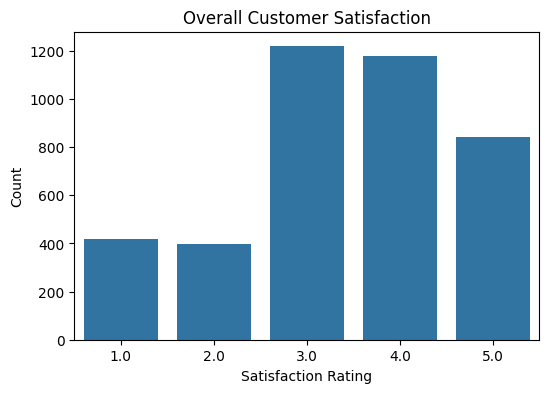

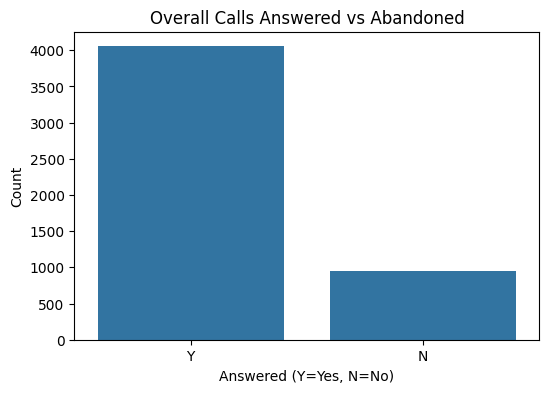

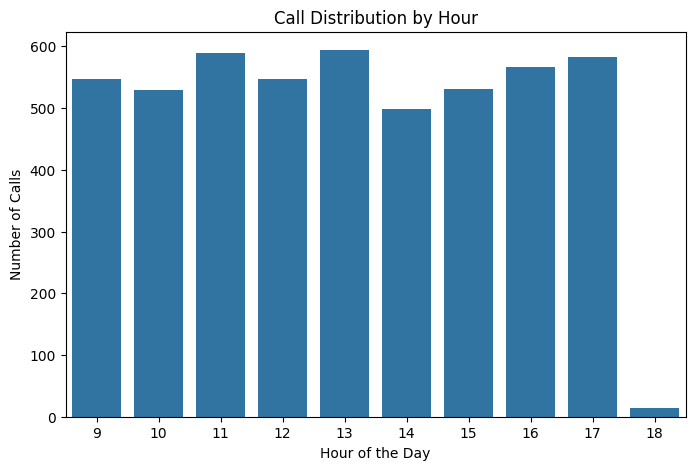

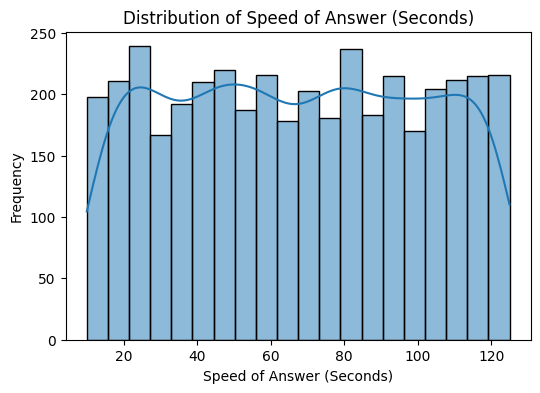

TypeError: agg function failed [how->mean,dtype->object]

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/01 Call-Center-Dataset.xlsx'
df = pd.read_excel(file_path)

# df['Date'] = pd.to_datetime(df['Date'])
# df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'],
#                                  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
#                                  ordered=True)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Satisfaction rating')
plt.title('Overall Customer Satisfaction')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Answered (Y/N)')
plt.title('Overall Calls Answered vs Abandoned')
plt.xlabel('Answered (Y=Yes, N=No)')
plt.ylabel('Count')
plt.show()

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Hour')
plt.title('Call Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Speed of answer in seconds', bins=20, kde=True)
plt.title('Distribution of Speed of Answer (Seconds)')
plt.xlabel('Speed of Answer (Seconds)')
plt.ylabel('Frequency')
plt.show()

agent_performance = df.groupby('Agent').agg({
    'AvgTalkDuration': 'mean',
    'Answered (Y/N)': lambda x: (x == 'Y').sum()
}).reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=agent_performance, x='AvgTalkDuration', y='Answered (Y/N)')
plt.title('Agent’s Performance Quadrant')
plt.xlabel('Average Handle Time (Seconds)')
plt.ylabel('Calls Answered')
plt.axvline(agent_performance['AvgTalkDuration'].mean(), color='red', linestyle='--')
plt.axhline(agent_performance['Answered (Y/N)'].mean(), color='red', linestyle='--')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Resolved')
plt.title('Number of Resolved vs Unresolved Calls')
plt.xlabel('Resolved (Y=Yes, N=No)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Resolved', y='Satisfaction rating')
plt.title('Satisfaction Rating by Resolution Status')
plt.xlabel('Resolved (Y=Yes, N=No)')
plt.ylabel('Satisfaction Rating')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='DayOfWeek')
plt.title('Call Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.show()


In [2]:
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating', 'DayOfWeek'],
      dtype='object')

In [6]:
print(df.columns.str.strip())


Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip()

In [9]:
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()


In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['DayOfWeek'] = df['Date'].dt.day_name()


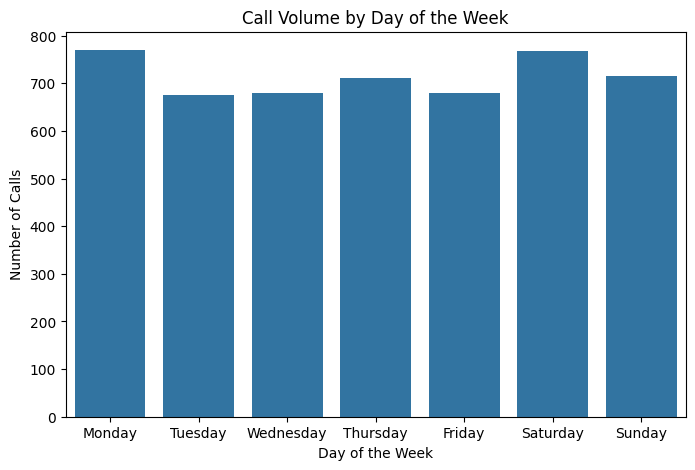

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='DayOfWeek',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Call Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.show()


In [14]:
print(df[['Date', 'DayOfWeek']].head())


        Date DayOfWeek
0 2021-01-01    Friday
1 2021-01-01    Friday
2 2021-01-01    Friday
3 2021-01-01    Friday
4 2021-01-01    Friday


In [18]:
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

df['TimeInSeconds'] = df['Time'].apply(time_to_seconds)

avg_call_time = df.groupby('DayOfWeek')['TimeInSeconds'].mean()

avg_call_time_formatted = avg_call_time.apply(lambda x: f"{int(x//3600)}:{int((x%3600)//60)}:{int(x%60)}")

print(avg_call_time_formatted)


KeyError: 'DayOfWeek'

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0          

<ipython-input-19-246899a918d3>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


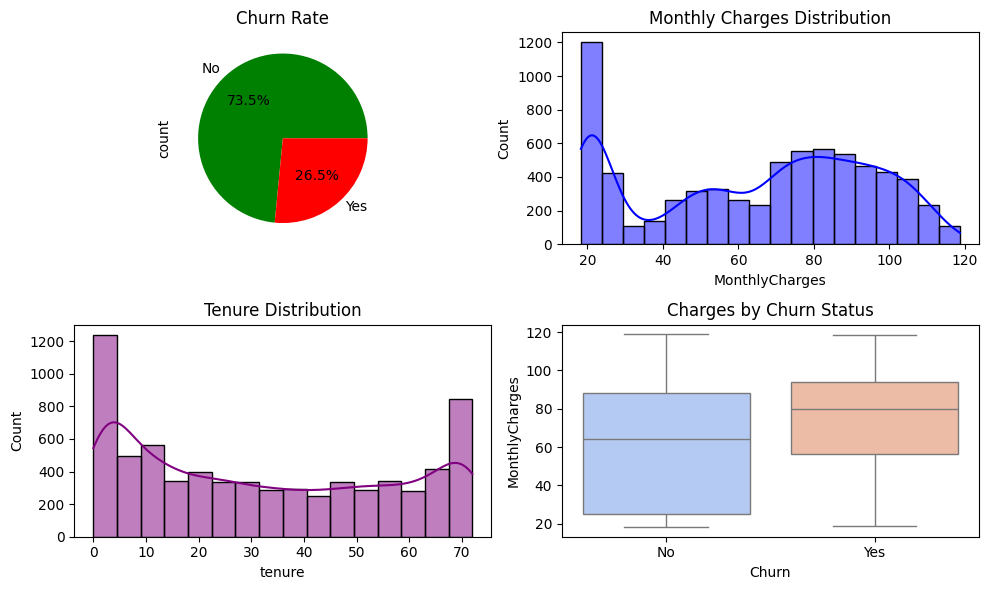

 Key Performance Indicators:

 Churn Rate: 26.54%
 Retention Rate: 73.46%
 Average Revenue Per User (ARPU): $64.76
 Customer Lifetime Value (CLV): $2096.41


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/02 Churn-Dataset.xlsx'
df = pd.read_excel(file_path)

print(df.head())


churn_rate = df['Churn'].value_counts(normalize=True).get('Yes', 0) * 100

retention_rate = 100 - churn_rate

arpu = df['MonthlyCharges'].mean()

clv = arpu * df['tenure'].mean()

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
df['Churn'].value_counts().plot.pie(autopct='%.1f%%', colors=['green', 'red'])
plt.title('Churn Rate')

plt.subplot(2, 2, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='blue')
plt.title('Monthly Charges Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['tenure'], kde=True, color='purple')
plt.title('Tenure Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Charges by Churn Status')

plt.tight_layout()
plt.show()

print(f" Key Performance Indicators:\n")
print(f" Churn Rate: {churn_rate:.2f}%")
print(f" Retention Rate: {retention_rate:.2f}%")
print(f" Average Revenue Per User (ARPU): ${arpu:.2f}")
print(f" Customer Lifetime Value (CLV): ${clv:.2f}")


<ipython-input-23-471d8b87927d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Churned', 'Retained'], y=[avg_charges_churned, avg_charges_retained], palette='coolwarm')
<ipython-input-23-471d8b87927d>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(service_churn.keys()), y=list(service_churn.values()), palette='rocket')


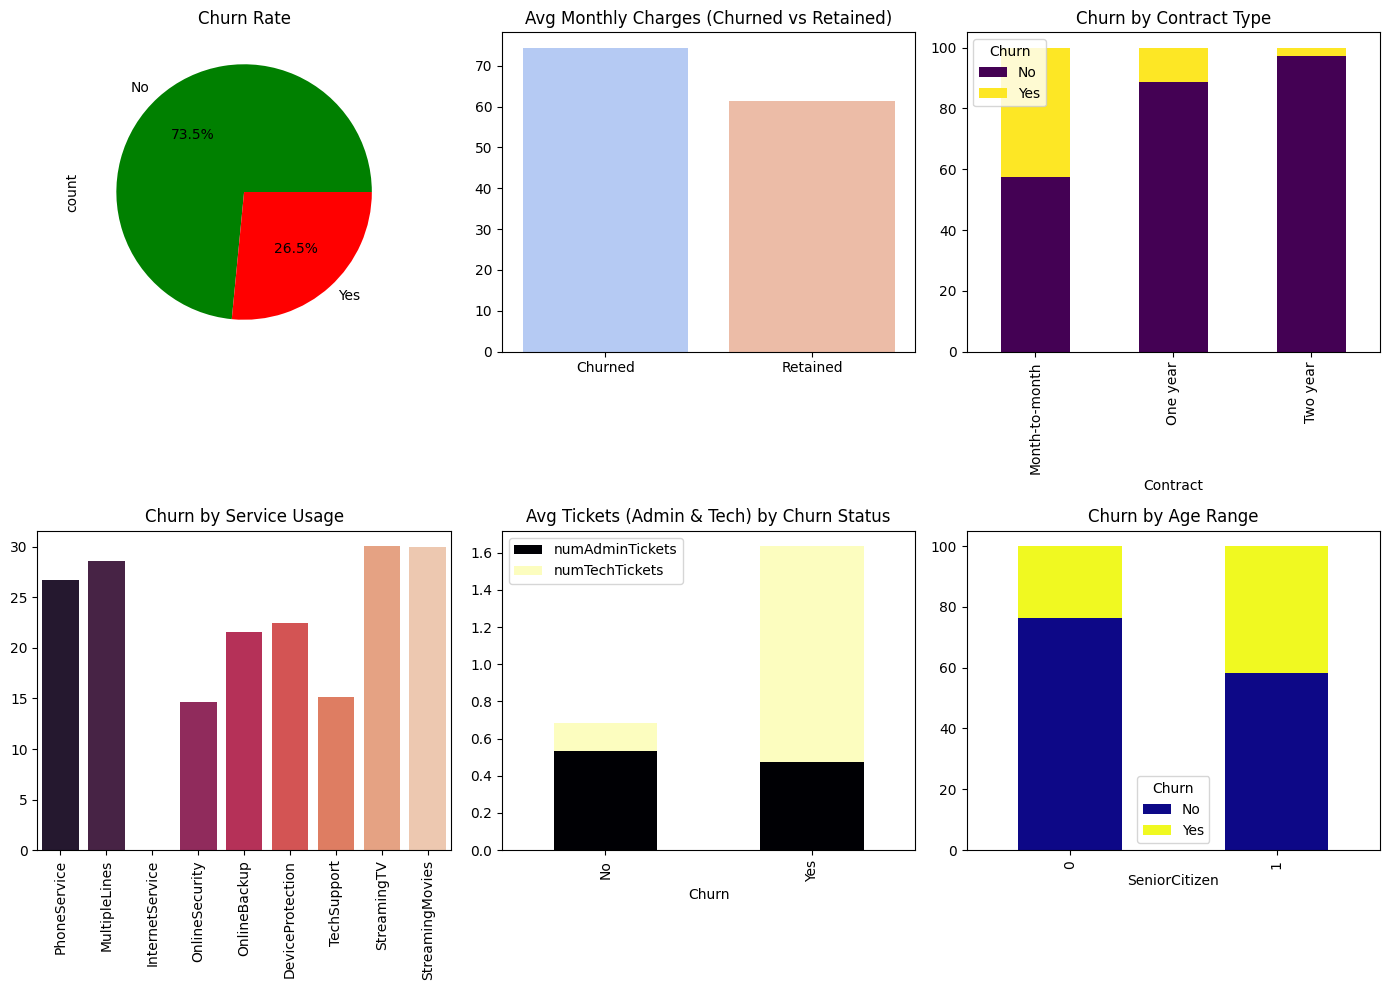

 Key Performance Indicators:

 Monthly Churn Rate: 26.54%
 Retention Rate: 73.46%
 Avg Monthly Charges (Churned): $74.44
 Avg Monthly Charges (Retained): $61.27
 Service-Based Churn Analysis: {'PhoneService': np.float64(26.70963684955196), 'MultipleLines': np.float64(28.6098956580276), 'InternetService': 0, 'OnlineSecurity': np.float64(14.611193660227837), 'OnlineBackup': np.float64(21.531494442157268), 'DeviceProtection': np.float64(22.50206440957886), 'TechSupport': np.float64(15.166340508806261), 'StreamingTV': np.float64(30.070188400443293), 'StreamingMovies': np.float64(29.941434846266475)}


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/02 Churn-Dataset.xlsx'
df = pd.read_excel(file_path)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['tenure'] = df['tenure'].fillna(0)


monthly_churn_rate = df[df['Churn'] == 'Yes'].shape[0] / df.shape[0] * 100

retention_rate = 100 - monthly_churn_rate

avg_charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
avg_charges_retained = df[df['Churn'] == 'No']['MonthlyCharges'].mean()

contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

service_churn = {}
for service in services:
    churn_rate = df[df[service] == 'Yes']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    service_churn[service] = churn_rate

ticket_analysis = df.groupby('Churn')[['numAdminTickets', 'numTechTickets']].mean()

age_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

partner_dependents_churn = df.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
df['Churn'].value_counts().plot.pie(autopct='%.1f%%', colors=['green', 'red'])
plt.title('Churn Rate')

plt.subplot(2, 3, 2)
sns.barplot(x=['Churned', 'Retained'], y=[avg_charges_churned, avg_charges_retained], palette='coolwarm')
plt.title('Avg Monthly Charges (Churned vs Retained)')

plt.subplot(2, 3, 3)
contract_churn.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Churn by Contract Type')

plt.subplot(2, 3, 4)
sns.barplot(x=list(service_churn.keys()), y=list(service_churn.values()), palette='rocket')
plt.xticks(rotation=90)
plt.title('Churn by Service Usage')

plt.subplot(2, 3, 5)
ticket_analysis.plot(kind='bar', stacked=True, colormap='magma', ax=plt.gca())
plt.title('Avg Tickets (Admin & Tech) by Churn Status')

plt.subplot(2, 3, 6)
age_churn.plot(kind='bar', stacked=True, colormap='plasma', ax=plt.gca())
plt.title('Churn by Age Range')

plt.tight_layout()
plt.show()

print(f" Key Performance Indicators:\n")
print(f" Monthly Churn Rate: {monthly_churn_rate:.2f}%")
print(f" Retention Rate: {retention_rate:.2f}%")
print(f" Avg Monthly Charges (Churned): ${avg_charges_churned:.2f}")
print(f" Avg Monthly Charges (Retained): ${avg_charges_retained:.2f}")
print(f" Service-Based Churn Analysis: {service_churn}")


In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

# of Men: 295
# of Women: 205
# of Leavers: 47
% of Employees Promoted: 10.20%
% of Women Promoted: 8.78%
% of Hires (Men): 0.00%
% of Hires (Women): 0.00%
% Turnover Rate: 9.40%
Average Performance Rating (Men): 2.41
Average Performance Rating (Women): 2.42


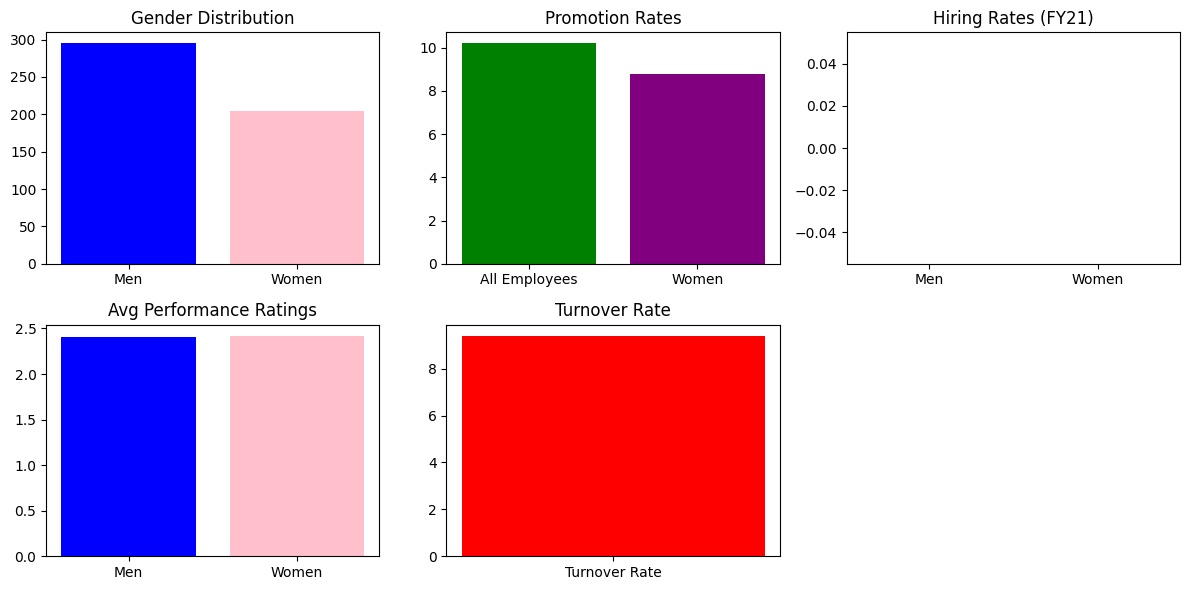

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/03 Diversity-Inclusion-Dataset.xlsx'
df = pd.read_excel(file_path)

num_men = df[df['Gender'] == 'Male'].shape[0]
num_women = df[df['Gender'] == 'Female'].shape[0]

num_leavers = df['Leaver FY'].notna().sum()

total_employees = df.shape[0]
promoted_employees = df[df['Promotion in FY21?'] == 'Yes'].shape[0]
promoted_women = df[(df['Promotion in FY21?'] == 'Yes') & (df['Gender'] == 'Female')].shape[0]

hires_men = df[(df['New hire FY20?'] == 'Yes') & (df['Gender'] == 'Male')].shape[0]
hires_women = df[(df['New hire FY20?'] == 'Yes') & (df['Gender'] == 'Female')].shape[0]

avg_performance_men = df[df['Gender'] == 'Male']['FY20 Performance Rating'].mean()
avg_performance_women = df[df['Gender'] == 'Female']['FY20 Performance Rating'].mean()

turnover_rate = (num_leavers / total_employees) * 100

percent_promoted = (promoted_employees / total_employees) * 100
percent_promoted_women = (promoted_women / num_women) * 100

percent_hires_men = (hires_men / total_employees) * 100
percent_hires_women = (hires_women / total_employees) * 100

print(f"# of Men: {num_men}")
print(f"# of Women: {num_women}")
print(f"# of Leavers: {num_leavers}")
print(f"% of Employees Promoted: {percent_promoted:.2f}%")
print(f"% of Women Promoted: {percent_promoted_women:.2f}%")
print(f"% of Hires (Men): {percent_hires_men:.2f}%")
print(f"% of Hires (Women): {percent_hires_women:.2f}%")
print(f"% Turnover Rate: {turnover_rate:.2f}%")
print(f"Average Performance Rating (Men): {avg_performance_men:.2f}")
print(f"Average Performance Rating (Women): {avg_performance_women:.2f}")

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.bar(['Men', 'Women'], [num_men, num_women], color=['blue', 'pink'])
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
plt.bar(['All Employees', 'Women'], [percent_promoted, percent_promoted_women], color=['green', 'purple'])
plt.title('Promotion Rates')

plt.subplot(2, 3, 3)
plt.bar(['Men', 'Women'], [percent_hires_men, percent_hires_women], color=['blue', 'pink'])
plt.title('Hiring Rates (FY21)')

plt.subplot(2, 3, 4)
plt.bar(['Men', 'Women'], [avg_performance_men, avg_performance_women], color=['blue', 'pink'])
plt.title('Avg Performance Ratings')

plt.subplot(2, 3, 5)
plt.bar(['Turnover Rate'], [turnover_rate], color='red')
plt.title('Turnover Rate')

plt.tight_layout()
plt.show()
